# PyTorch

Here's your best friend when working with PyTorch: https://pytorch.org/docs/stable/index.html.

In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D, art3d
from matplotlib.patches import Circle, Ellipse
import seaborn as sns
import matplotlib.ticker as ticker
from IPython.display import Markdown, display, HTML

import torch
import torch.nn as nn
import torch.optim as optim

# Fix the dying kernel problem (only a problem in some installations - you can remove it, if it works without it)
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## PyTorch basic operations tasks

**Task 1.** Calculate the sigmoid (logistic) function on every element of the following array [0.3, 1.2, -1.4, 0.2, -0.1, 0.1, 0.8, -0.25] and print the last 5 elements. Use only tensor operations.

In [5]:
t = torch.tensor([0.3, 1.2, -1.4, 0.2, -0.1, 0.1, 0.8, -0.25])
y = 1 / (1 + torch.exp(-t))

print(y[-5:])


tensor([0.5498, 0.4750, 0.5250, 0.6900, 0.4378])


**Task 2.** Calculate the dot product of the following two vectors:<br/>
$x = [3, 1, 4, 2, 6, 1, 4, 8]$<br/>
$y = [5, 2, 3, 12, 2, 4, 17, 9]$<br/>
a) by using element-wise mutliplication and torch.sum,<br/>
b) by using torch.dot,<br/>
b) by using torch.matmul and transposition (x.T).

In [4]:
x = torch.tensor([3, 1, 4, 2, 6, 1, 4, 8])
y = torch.tensor([5, 2, 3, 12, 2, 4, 17, 9])

print(torch.sum(x * y))
print(torch.dot(x, y))
print(torch.matmul(x, y.reshape(-1, 1))[0])


tensor(209)
tensor(209)
tensor(209)


**Task 3.** Calculate the following expression<br/>
$$\frac{1}{1 + e^{-x_0 \theta_0 - \ldots - x_9 \theta_9 - \theta_{10}}}$$
for<br/>
$x = [1.2, 2.3, 3.4, -0.7, 4.2, 2.7, -0.5, 1.4, -3.3, 0.2]$<br/>
$\theta = [1.7, 0.33, -2.12, -1.73, 2.9, -5.8, -0.9, 12.11, 3.43, -0.5, -1.65]$<br/>
and print the result. Use only tensor operations.

In [6]:
x = torch.tensor([1.2, 2.3, 3.4, -0.7, 4.2, 2.7, -0.5, 1.4, -3.3, 0.2])
theta = torch.tensor([1.7, 0.33, -2.12, -1.73, 2.9, -5.8, -0.9, 12.11, 3.43, -0.5, -1.65])
print((1 / (1 + torch.exp(-1* torch.sum(x * theta[:10]) - theta[10]))).item())


0.0876237079501152


# Tensor gradients

**Task 4.** Calculate the derivative $f'(w)$ using PyTorch and backward propagation (the backward method of the Tensor class) for the following functions and points:
  - $f(w) = w^3 + w^2$ and $w = 2.0$,
  - $f(w) = \text{sin}(w)$ and $w = \pi$,
  - $f(w) = \ln(w * e^{3w})$ and $w = 1.0$.
  
Print the values of those derivatives.

In [7]:
w = torch.tensor(2.0, requires_grad=True) # ustalamy wartosc W
f = torch.pow(w, 3) + torch.pow(w, 2) # podnosimy kolejno do 3 i 2 potegi
f.backward() # wykonujemy operacje
print(w.grad.item())

w = torch.tensor(np.pi, requires_grad=True) # ustalamy wartosc W
f = torch.sin(w) # nakładamy funkcje 'sin' na wartosc W
f.backward()
print(w.grad.item())

w = torch.tensor(1.0, requires_grad=True) # ustalamy wartosc W
f = torch.log(w * torch.exp(3 * w))
f.backward()
print(w.grad.item())


16.0
-1.0
4.0


**Task 5.** Calculate the derivative $\frac{\partial f}{\partial w_1}(w_1, w_2, w_3)$ using PyTorch and backward propagation (the backward method of the Tensor class) for the following functions and points:
  - $f(w_1, w_2) = w_1^3 + w_1^2 + w_2$ and $(w_1, w_2) = (2.0, 3.0)$,
  - $f(w_1, w_2, w_3) = \text{sin}(w_1) * w_2 + w_1^2 * w_3$ and $(w_1, w_2) = (\pi, 2.0, 4.0)$,
  - $f(w_1, w_2, w_3) = e^{w_1^2 + w_2^2 + w_3^2} + w_1^2 + w_2^2 + w_3^2$ and $(w_1, w_2, w_3) = (0.5, 0.67, 0.55)$.
  
Print the values of those derivatives.

In [8]:
w = torch.tensor([2.0, 3.0], requires_grad=True)
f = torch.pow(w[0], 3) + torch.pow(w[0], 2) + w[1]
f.backward()
print(w.grad[0].item())

w = torch.tensor([np.pi, 2.0, 4.0], requires_grad=True) # ustalamy parametry wejsciowe
f = torch.sin(w[0]) * w[1] + torch.pow(w[0], 2) * w[2]
f.backward()
print(w.grad[0].item())

w = torch.tensor([0.5, 0.67, 0.55], requires_grad=True)
f = torch.exp(torch.sum(torch.pow(w, 2))) + torch.sum(torch.pow(w, 2)) # operacja wykonywana na calym zbiorze wartosci W
f.backward()
print(w.grad[0].item())


16.0
23.132741928100586
3.722090005874634


# Backpropagation

**Task 6.** Write the calculate_se_array(base_w, x, y_target, weight_idx, weight_start, weight_end) which `generates a numpy array of squared errors` for the following `sigmoid function` $\text{sigmoid}(w * x)$ and target value $y_target$, where $x$ is a vector of dimension 3 and $w$ is a vector of weights of the same dimension. The function should generate a set of weight vectors w which have the same value as base_w on all coordinates other than weight_idx, and should have 100 values on the weight_idx coordinate ranging from weight_start to weight_end. Example for weight_idx =1: 

w = [[base_w[0], weight_start, base_w[2]], [base_w[0], weight_start + step, base_w[2]], ..., [base_w[0], weight_end - step, base_w[2]], [base_w[0], weight_end, base_w[2]]]

Then the function should calculate and return an array of squared errors between the value of the sigmoid on x with respect to all those weight vectors and the target value y_target. This will allow you to see how the error of a single neuron depends on every weight separately.

The function should work even if base_w and x are tensors (a safe way to do is tensor.cpu().detach().numpy()).

You're encouraged to experiment with different neural nets to see how the error depends on all its parameters.

In [9]:
# wyliczyć wsztskie błędy
# zrobić zakres
def calculate_se_array(base_w, x, y_target, weight_idx, weight_start, weight_end):
    
    # ustal czy obliczenia maja byc na procesorze czy na kacie graficznej
    if isinstance(base_w, torch.Tensor):
        base_w = base_w.cpu().detach().numpy()
    if isinstance(x, torch.Tensor):
        x = x.cpu().detach().numpy()
        
    w = np.linspace(weight_start, weight_end, 100)
    
    if weight_idx == 0:
        w_array = np.array([[w_single, base_w[1], base_w[2]] for w_single in w])
    elif weight_idx == 1:
        w_array = np.array([[base_w[0], w_single, base_w[2]] for w_single in w])
    elif weight_idx == 2:
        w_array = np.array([[base_w[0], base_w[1], w_single] for w_single in w])
    
    # use SIGMOID FUNCTION
    y = np.array([1 / (1 + np.exp(-np.sum(x * w))) for w in w_array])
    
    return np.power(y_target - y, 2)

In the next cell you can test the method and in the cell after that you can see the error plots for the training you saw in the lecture. The red dot indicates the current weight value and the error it gives. The red dot should arrive at the lowest point at the end of training.

In [10]:
x = torch.tensor([2., -1., 3.], requires_grad=False)
w = torch.tensor([-0.65, -0.4, -1.], requires_grad=True)
y_target = 0.65

base_w = w
weight_idx = 0 
weight_start = -5
weight_end = 5

print(calculate_se_array(base_w, x, y_target, weight_idx, weight_start, weight_end))

[4.22495616e-01 4.22494635e-01 4.22493434e-01 4.22491964e-01
 4.22490165e-01 4.22487963e-01 4.22485269e-01 4.22481971e-01
 4.22477935e-01 4.22472995e-01 4.22466950e-01 4.22459551e-01
 4.22450496e-01 4.22439415e-01 4.22425852e-01 4.22409255e-01
 4.22388943e-01 4.22364085e-01 4.22333664e-01 4.22296436e-01
 4.22250879e-01 4.22195130e-01 4.22126913e-01 4.22043441e-01
 4.21941308e-01 4.21816348e-01 4.21663471e-01 4.21476456e-01
 4.21247704e-01 4.20967934e-01 4.20625821e-01 4.20207554e-01
 4.19696299e-01 4.19071560e-01 4.18308413e-01 4.17376590e-01
 4.16239400e-01 4.14852462e-01 4.13162241e-01 4.11104367e-01
 4.08601768e-01 4.05562633e-01 4.01878287e-01 3.97421119e-01
 3.92042797e-01 3.85573102e-01 3.77819925e-01 3.68571130e-01
 3.57599255e-01 3.44670231e-01 3.29557487e-01 3.12062739e-01
 2.92044401e-01 2.69453562e-01 2.44375670e-01 2.17073471e-01
 1.88023451e-01 1.57935039e-01 1.27740455e-01 9.85451558e-02
 7.15357116e-02 4.78531366e-02 2.84523255e-02 1.39770791e-02
 4.68029381e-03 4.084712

Epoch: 10
[-0.58531946 -0.43234026 -0.90297925]
0.3851410150527954


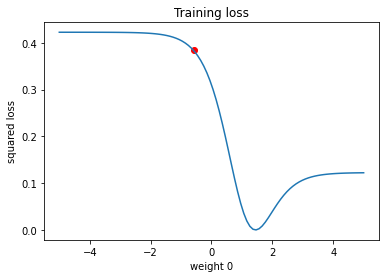

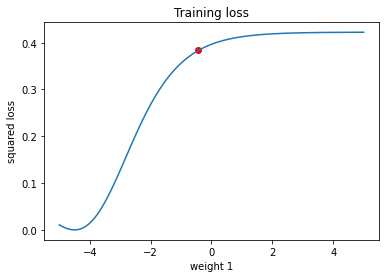

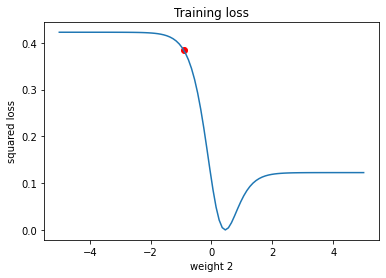

Epoch: 20
[-0.49078268 -0.47960865 -0.76117414]
0.35564038157463074


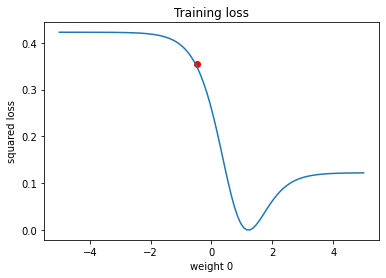

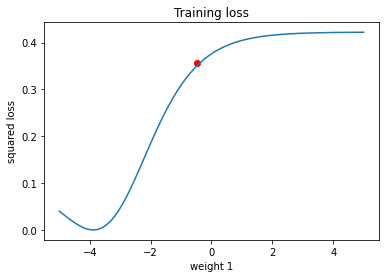

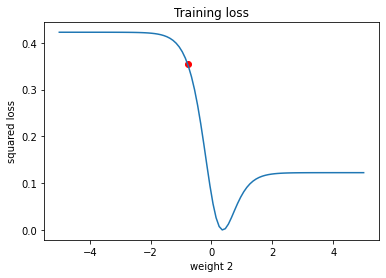

Epoch: 30
[-0.30187887 -0.5740606  -0.47781843]
0.23878827691078186


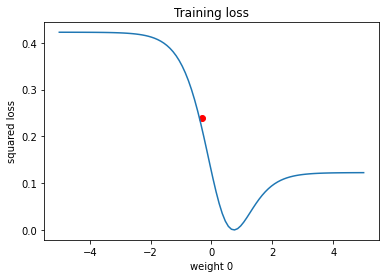

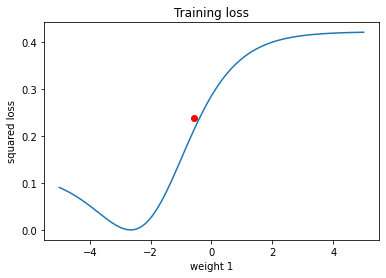

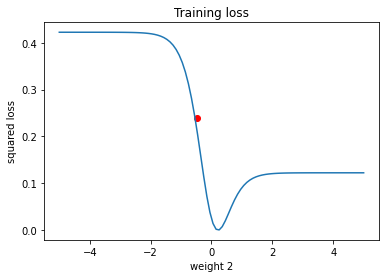

Epoch: 40
[-0.0654837  -0.6922581  -0.12322567]
0.015304217115044594


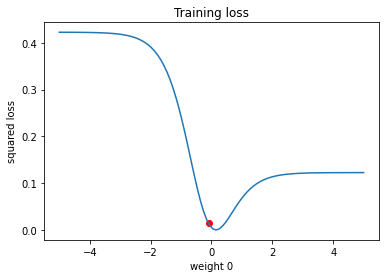

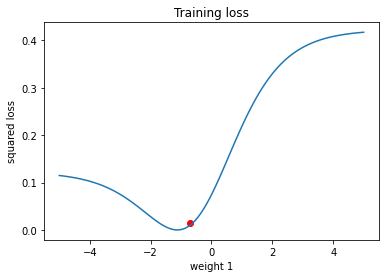

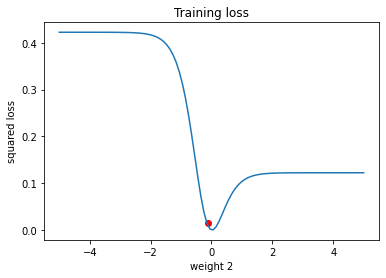

Epoch: 50
[-0.01547235 -0.7172638  -0.04820866]
0.00044050562428310513


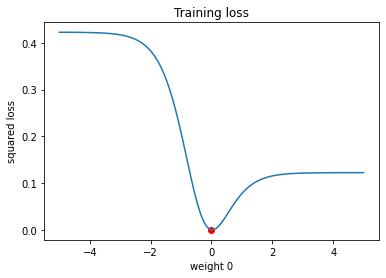

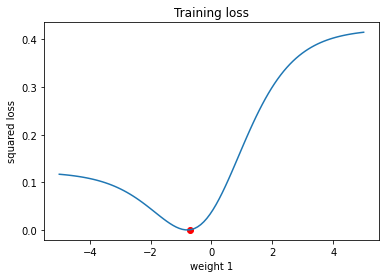

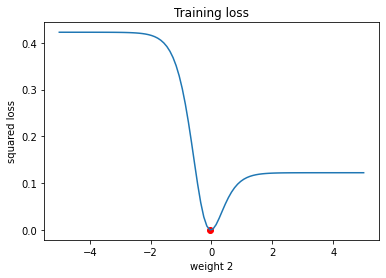

Epoch: 60
[-0.00666123 -0.7216694  -0.03499197]
1.752088610373903e-05


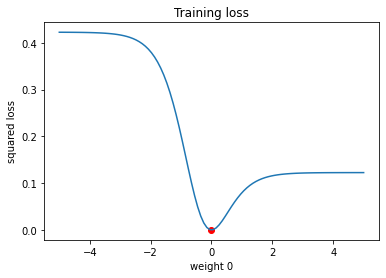

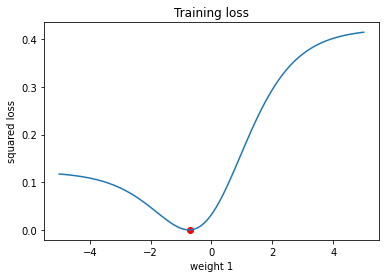

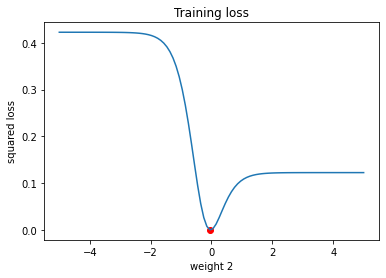

Epoch: 70
[-0.00488764 -0.7225562  -0.0323316 ]
7.503618917326094e-07


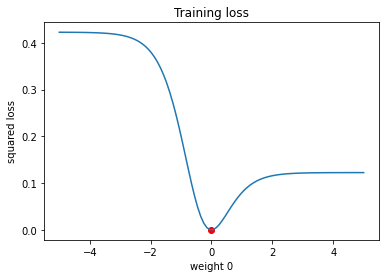

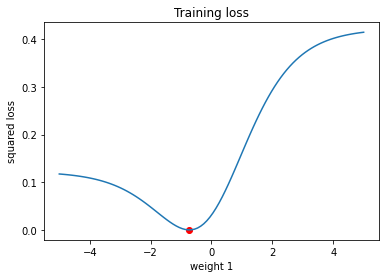

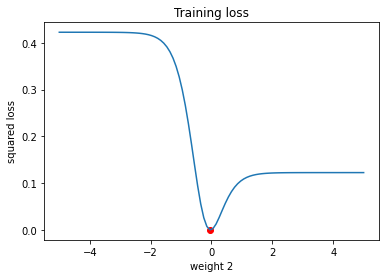

Epoch: 80
[-0.00451991 -0.72274005 -0.03178   ]
3.263864201130673e-08


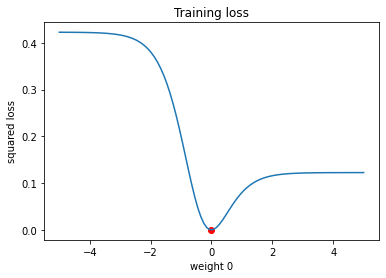

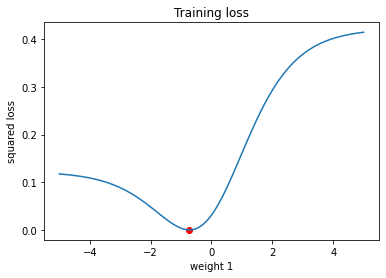

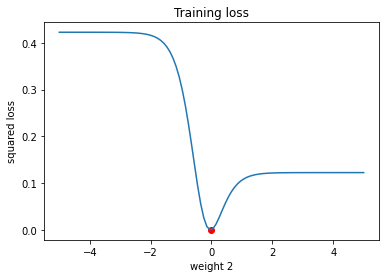

Epoch: 90
[-0.00444318 -0.72277844 -0.03166491]
1.423533291244894e-09


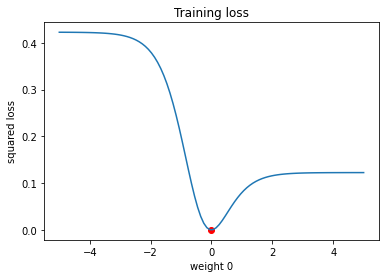

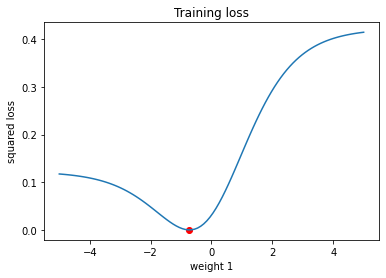

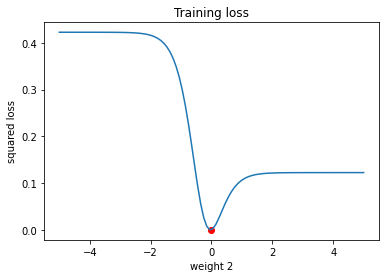

In [11]:
x = torch.tensor([2., -1., 3.], requires_grad=False)
w = torch.tensor([-0.65, -0.4, -1.], requires_grad=True)
y_target = 0.65

optimizer = optim.SGD([w], lr=0.1)

losses = []
n_epochs = 100
for epoch in range(n_epochs):

    optimizer.zero_grad()
    y = torch.sigmoid(torch.sum(x * w))
    loss = torch.pow(y - y_target, 2)
    loss.backward()
    losses.append(loss.item())
    optimizer.step()

    if epoch > 0 and epoch % 10 == 0:
        print("Epoch: {}".format(epoch))
        print(w.cpu().detach().numpy())
        print(loss.item())
        for i in range(3):    
            w_range = np.linspace(-5, 5, 100)
            errors = calculate_se_array(w, x, y_target, i, -5, 5)
            sns.lineplot(x=w_range, y=errors).set_title('Training loss')
            plt.scatter([w[i].item()], [loss.item()], color='red')
            plt.xlabel("weight {}".format(i))
            plt.ylabel("squared loss")
            plt.show()

**Task 7*.** Train a neural network with:
  - two input neurons, 
  - four hidden neurons with no bias and sigmoid activation in the first hidden layer,
  - four hidden neurons with no bias and with sigmoid activation in the second hidden layer,
  - one output neuron with no bias and without sigmoid activation 
  
to get a good approximation of $f(x) = x_1 * x_2 + 1$ on the following dataset $D = \{(1.0, 1.0), (0.0, 0.0), (2.0, -1.0), (-1.0, 0.5), (-0.5, -2.0)\}$, i.e. the network should satisfy:
  - $\text{net}(1.0, 1.0) \sim 2.0$,
  - $\text{net}(0.0, 0.0) \sim 1.0$,
  - $\text{net}(2.0, -1.0) \sim -1.0$,
  - $\text{net}(-1.0, 0.5) \sim 0.5$,
  - $\text{net}(-0.5, -2.0) \sim 2.0$.
  
Use seed=6789 to initialize the network.

After training print all weights and separately print $w_{1, 2}^{(1)}$ (the weight from the second input to the first hidden neuron in the first hidden layer) and $w_{1, 3}^{(3)}$ (the weight from the third hidden neuron in the second hidden layer to the output unit).

Print the values of the network on the training points and verify that these values are closer to the real values of the $f$ function than $\epsilon = 0.1$, i.e. $|\text{net}(x) - f(x)| < \epsilon$ for $x \in D$.

Because this network is only tested on the training set, it will certainly overfit if trained long enough. Train for 1000 epochs and then calculate
  - $\text{net}(2.0, 2.0)$,
  - $\text{net}(-1.0, -1.0)$,
  - $\text{net}(3.0, -3.0)$.
  
How far are these values from real values of the function $f$?

In [3]:
# ma wyjsc ze punktow jest za mało by sensownie przedstawić funkcje w postaci sieci neuronowej
class TwoLayerModel(nn.Module):
    def __init__(self, seed):
        super().__init__()

        self.seed = torch.manual_seed(seed)

        self.fc_1 = nn.Linear(2, 4, bias=False)
        self.fc_2 = nn.Linear(4, 4, bias=False)
        self.fc_3 = nn.Linear(4, 1, bias=False)

    def forward(self, x):
        x = torch.sigmoid(self.fc_1(x))
        x = torch.sigmoid(self.fc_2(x))
        x = self.fc_3(x)

        return x


In [ ]:
# Initialize the data
x_data = [torch.tensor([1.0, 1.0]), 
          torch.tensor([0.0, 0.0]), 
          torch.tensor([2.0, -1.0]), 
          torch.tensor([-1.0, 0.5]), 
          torch.tensor([-0.5, -2.0])
         ]

y_data = [torch.tensor(2.0),
          torch.tensor(1.0),
          torch.tensor(-1.0),
          torch.tensor(0.5),
          torch.tensor(2.0)
         ]

# Initialize the neural network and optimizer
neural_net = TwoLayerModel(seed=6789)

optimizer = optim.SGD(neural_net.parameters(), lr=0.1)

losses = []
n_epochs = 1000
for epoch in range(n_epochs):

    optimizer.zero_grad()
    
    for i in range(len(x_data)):
        
        y = neural_net(x_data[i])
        if i == 0:
            loss = torch.pow(y - y_data[i], 2)
        else:
            loss += torch.pow(y - y_data[i], 2)
    
    loss.backward()
    losses.append(loss.item())
        
    optimizer.step()

########################
# Write your code here #
########################


print("All weights - layer by layer starting from left to right")
for param in neural_net.parameters():
    print(param.data)



print()
print("w_{{1, 2}}^{{(1)}} (rounded to 4 decimal points)")

print(np.round(list(neural_net.parameters())[0].data[0][1].item(), 4))



print()
print("w_{{1, 3}}^{{(2)}} (rounded to 4 decimal points)")

print(np.round(list(neural_net.parameters())[2].data[0][2].item(), 4))



print()
print("Values on the training data (verify the difference is below epsilon)")

########################
# Write your code here #
########################


print()
print("NN value on x=[2.0, 2.0] vs real value")

########################
# Write your code here #
########################


print()
print("NN value on x=[-1.0, -1.0] vs real value")

########################
# Write your code here #
########################

print()
print("NN value on x=[3.0, -3.0] vs real value")

########################
# Write your code here #
########################
